<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive-Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CIFAR-10</a></span></li><li><span><a href="#Comparison-with-a-random-classifier" data-toc-modified-id="Comparison-with-a-random-classifier-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparison with a random classifier</a></span></li></ul></li><li><span><a href="#Bayesian-Linear-Regression" data-toc-modified-id="Bayesian-Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bayesian Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li><li><span><a href="#Bonus-Point" data-toc-modified-id="Bonus-Point-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bonus Point</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li></ul></div>

# Introduction
Notebook by: Sara Giammusso.

In this notebook I analyzed the Fashion MNIST and CIFAR10 datasets available to download from: 
<ul>
    <li>https://www.kaggle.com/zalando-research/fashionmnist/data</li>
    <li>https://www.cs.toronto.edu/~kriz/cifar.html</li>
</ul>
I'll start importing the main modules and defining some utility functions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
sns.set(style="whitegrid")
sns.set_color_codes()
plt.rcParams['font.family'] = 'Tahoma'
from sklearn.model_selection import train_test_split


In [113]:
def read_mnist(dataset='training', path='.'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    From: https://gist.github.com/akesling/5358964
    """
    import os, struct

    if dataset is 'training':
        fname_img = os.path.join(path, 'fashionmnist/train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/train-labels-idx1-ubyte')
    elif dataset is 'testing':
        fname_img = os.path.join(path, 'fashionmnist/t10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/t10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return list(zip(lbl, img))

def plot_label_distribution(distribution, title, labels):
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x = np.array(range(10)), y = distribution, color='b')
    ax.set_title(title,fontsize=20)
    ax.set_xticklabels(labels, fontsize=13, weight='bold', rotation=70)
    ax.set_ylabel('Count',fontsize=13, weight='bold')
    plt.show()
    
    
# Compute confusion matrix
def plot_confusion_matrix(x, y, title, labels):
    cnf_matrix = confusion_matrix(x, y)
    df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
    plt.figure(figsize = (12,9))
    plt.title(title,fontsize=20)
    ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g',square=True,linewidths=.7, cbar_kws={"shrink": .5})
    ax.set_xticklabels(labels,fontsize=10, weight='bold', rotation=90)
    b = ax.set_yticklabels(labels,fontsize=10, weight='bold',rotation=360)


def scatter_plot_ty(t,y, title):
    plt.figure(figsize = (12,6))
    plt.title(title,fontsize=20)
    plt.xlabel('True targets',fontsize=13)
    plt.ylabel('Predictions',fontsize=13)
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.scatter(t, y, alpha=0.2)
    
'''
From https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py

Functions for downloading the CIFAR-10 data-set from the internet 
and loading it into memory.

'''

import pickle
import os

data_path = "./cifar-10-batches-py/"

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """
    return os.path.join(data_path, filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images



def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls



def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls

def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls


In [ ]:
'''
Helper-function to plot CIFAR-10 images 
from https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py
'''
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Data exploration
In this section I'm going to import and analyse the Fashion MNIST and CIFAR10 datasets.

## Fashion MNIST

Let's start with Fashion MNIST.<br>
Each training and test example is assigned to one of the following labels:

<table style="width:30%">
  <tr>
    <th>Label</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

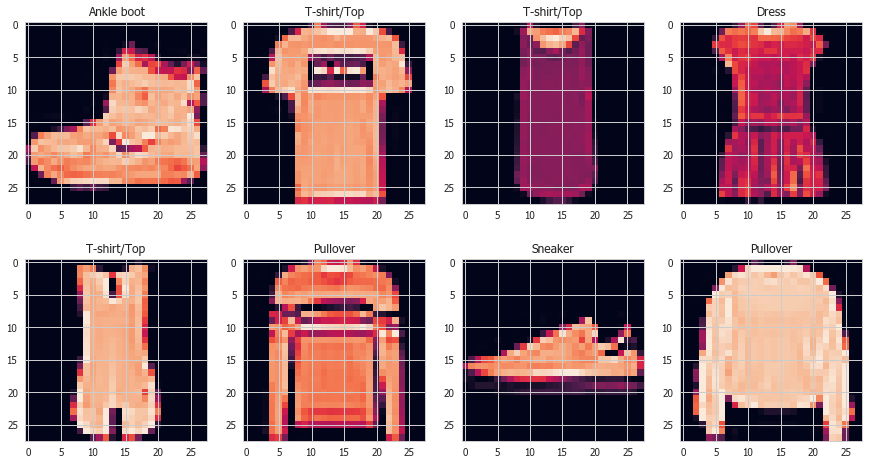

In [3]:
mnist_labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag','Ankle boot']
mnist_train = read_mnist('training')
mnist_test = read_mnist('testing')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, (label, image) in zip(axes.flat, mnist_train[:8]):
    ax.imshow(image)
    ax.set_title(mnist_labels[label])
plt.show()

In [4]:
# Load data in Pandas DataFrames
data_train_mnist = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test_mnist = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

data_train_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The class labels are perfectly balanced.<br>
This is true both for the training set (6000 samples per class) and for the test set (1000 samples per class).

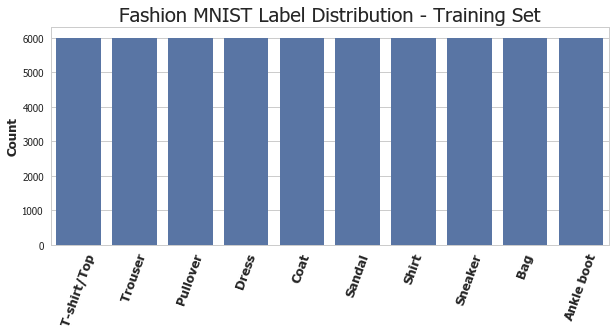

In [10]:
label_distribution = data_train_mnist['label'].value_counts()
plot_label_distribution(label_distribution, 'Fashion MNIST Label Distribution - Training Set', mnist_labels)

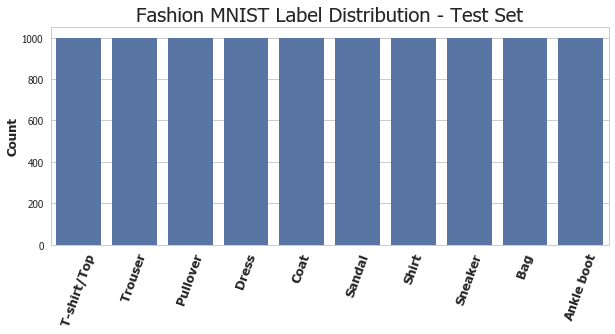

In [9]:
label_distribution = data_test_mnist['label'].value_counts()
plot_label_distribution(label_distribution, 'Fashion MNIST Label Distribution - Test Set', mnist_labels)

## CIFAR-10


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>

The dataset is divided into five training batches and one test batch, each with 10000 images. <br>
The test batch contains exactly 1000 randomly-selected images from each class.<br>
The training batches contain exactly 5000 images from each class. 

In [193]:
images, cls = load_training_data()
images_test, cls_test = load_test_data()
class_names = load_class_names()
class_names

Loading data: ./cifar-10-batches-py/data_batch_1
Loading data: ./cifar-10-batches-py/data_batch_2
Loading data: ./cifar-10-batches-py/data_batch_3
Loading data: ./cifar-10-batches-py/data_batch_4
Loading data: ./cifar-10-batches-py/data_batch_5
Loading data: ./cifar-10-batches-py/test_batch
Loading data: ./cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
print(np.shape(images), np.shape(cls))

(50000, 32, 32, 3)


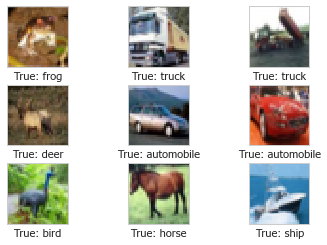

In [17]:
# Plot the images and labels using our helper-function above.
plot_images(images=images[:9], cls_true=cls[:9], smooth=False)

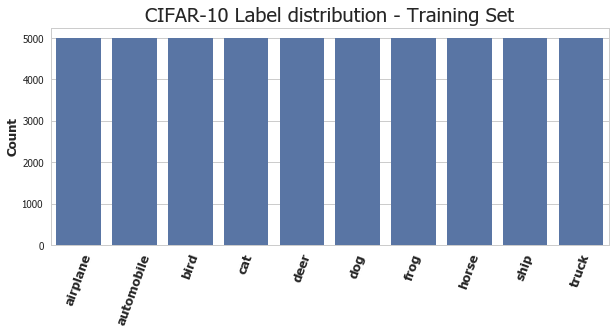

In [18]:
label_distribution = np.bincount(cls)
plot_label_distribution(label_distribution,'CIFAR-10 Label distribution - Training Set',class_names )

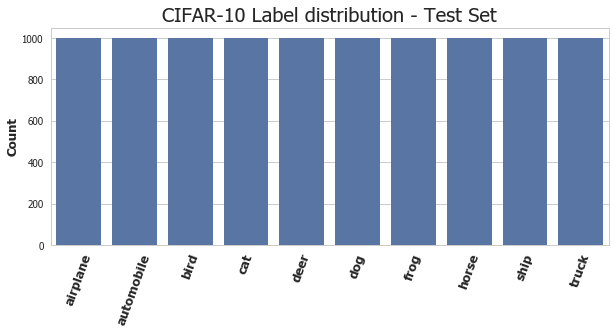

In [19]:
label_distribution = np.bincount(cls_test)
plot_label_distribution(label_distribution,'CIFAR-10 Label distribution - Test Set',class_names )

<div class="alert alert-success">
<strong>Question 2</strong><br>
<b><i>Comment the distribution of class labels and the dimensionality of the input and how this may affect the analysis.<br></i></b>

<p>In both Fashion MNIST and CIFAR-10, class labels are perfectly balanced (both in training set and in test set). <br>
This is a great advantage, indeed most algorithms minimize a sum of a loss function over all data points. This works better for balanced datasets, and worse for unbalanced datasets. For example, consider a highly unbalanced dataset — 90% points of class 1 and 10% points of class -1. Then, the loss is very low if you predict all points belonging to class 1.</p>


<p>Fashion MNIST and CIFAR-10 contain pictures of size respectively 28x28 and 32x32x3, so the input dimensionality will be 784 on Fashion MNIST and 3072 on CIFAR-10.<br>
Such a big input dimensionality can deteriorate performances in term of computation time, especially for the Bayesian Linear Regression. Indeed building and performing operation on the X matrix can be really costly especially for orders > 1. <br>
</p>
</div>

# Naive-Bayes Classifier

## Introduction
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
This probabilistic classifier is based on Bayes rule:
$$P(t_{new}=k\mid X,t,x_{new}) = \frac{P(x_{new}\mid t_{new}=k, X, t)P(t_{new}=k)}{\sum_j p(x_{new}\mid t_{new}=j,X,t)P(t_{new}=j)}$$
Naive-bayes makes the following additional likelihood assumption: the components of $x_{new}$ are independent for a particular class,i.e. 
$$P(x_{new}\mid t_{new}=k,X,t) = \prod_{d=1}p(x^{new}_d\mid t_{new}=k,X,t)$$
where $D$ is the number of dimensions and $x_d^{new}$ is the valued of dth one.<br>

<div class="alert alert-success">
  <strong>Question 3B</strong><br>
<b><i>Descrive a positive and a negative of the classifier for these tasks.<br><br></i></b>
<b>Advantages</b>:<ol>
    <li>it can be used when D is high because fitting D uni-variate distributions is easier than fitting one D-dimensional one;</li>
    <li>Simple to implement;</li>
    <li>Fast.</li>
</ol>
<b>Disadvantage</b>: <ol>
    <li>Naive Bayes classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class. Due to this, the result can be (potentially) very bad.</li>
    </ol>
    
In our case, D is really high (28x28 for the Fashion MNIST dataset and 32x32x3 for the CIFAR-10 dataset) so Naive-bayes could be a great solution. <br>
However the naive assumption maybe does not fit well our problem since, I am not sure that given a class label, the different pixel values in a picture are totally independent, e.g., if you know that the picture is a t-shirt and you know the value of a pixel in the majority of the cases you expect the pixel next to it to have a similar value. 
</div>

## Implementation

In [150]:
def prior_means_variances(train, N):
    # means = (num_classes, num_features)
    # variances = (num_classes, num_features)
    p = np.zeros(N)
    m = np.zeros((N, np.shape(train)[1]-1))
    v = np.zeros((N, np.shape(train)[1]-1))
    for i in range(N):
        p[i] = np.sum([x[0] == i for x in train])/len(train)
        m[i] = np.mean([x[1:] for x in train if x[0] == i], axis=0)
        v[i] = np.var([x[1:] for x in train if x[0] == i], axis=0)
        for j in range(np.shape(train)[1]-1):
            if v[i,j] <= 0:
                v[i,j] = 1e-10
    return p, m, v

def predict(X, prior, m, v):
    # X = (num_samples, num_features)
    # prior = (num_class,)
    # m = (num_class, num_features)
    # v = (num_class, num_features)
    # predictions = (num_classes, num_samples) 
    predictions = np.zeros((len(prior),len(X)))
  
    for i in range(len(prior)):
        prior_i = np.log(prior[i])
        gaussian_i = -0.5 * (np.sum(np.log(2. * np.pi * v[i,:])) + np.sum(((X - m[i,:])**2) / (v[i,:]), 1))
     
        predictions[i] = prior_i + gaussian_i      
    
    
    result = np.argmax(predictions.T,axis = 1)
    sum_likelihood = np.sum(np.max(predictions.T , axis=1))
    
    return result, sum_likelihood

def accuracy(y, t): 
    # y = computed class
    # t = true class
    return np.sum([y[i] == t[i] for i in range(len(y))]) / len(y)

## Fashion MNIST

In [143]:
'''
Fashion MNIST - Data preparation
'''

N = 10 
mnist_train = data_train_mnist.values
mnist_test  = data_test_mnist.values

# Compute mu, sigma2, and p(t=k) for all the classes
mnist_prior, mnist_means, mnist_vars = prior_means_variances(mnist_train, N)


'''
Fashion MNIST - Naive-Bayes Prediction
'''

start_time = time.time()
mnist_predictions, mnist_likelihood = predict(mnist_test[:,1:], mnist_prior, mnist_means, mnist_vars)
elapsed_time = time.time() - start_time

print('Fashion MNIST - Accuracy Naive-Bayes: %.2f%%' % (accuracy(mnist_predictions, mnist_test[:,0]) * 100))
print('Fashion MNIST - Likelihood: %.2f' %mnist_likelihood)
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)

Fashion MNIST - Accuracy Naive-Bayes: 57.53%
Fashion MNIST - Likelihood: -34074582.72
Fashion MNIST - Elapsed time: 0.91 s


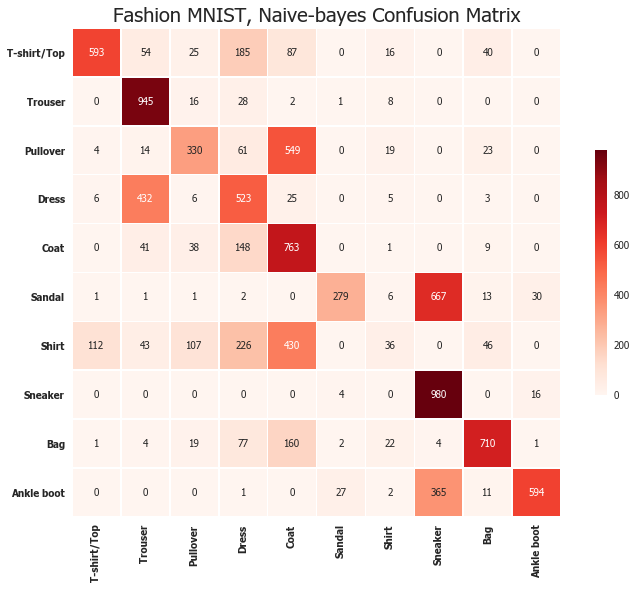

In [44]:
plot_confusion_matrix(mnist_test[:,0], mnist_predictions[:],'Fashion MNIST, Naive-bayes Confusion Matrix', mnist_labels)

## CIFAR-10

In [144]:
'''
CIFAR-10 - Data preparation
'''

N = 10
cifar_train = np.array([x.flatten() for x in images])
cifar_train = np.hstack((cls.reshape(-1,1),cifar_train))
cifar_test = np.array([x.flatten() for x in images_test])
cifar_test = np.hstack((cls_test.reshape(-1,1),cifar_test))

# Compute mu, sigma2, and p(t=k) for all the classes
cifar_prior, cifar_means, cifar_vars = prior_means_variances(cifar_train, N)

'''
CIFAR-10 - Naive-Bayes Prediction
'''

start_time = time.time()
cifar_predictions, cifar_likelihood = predict(cifar_test[:,1:], cifar_prior, cifar_means, cifar_vars)
elapsed_time = time.time() - start_time

print('CIFAR-10 - Accuracy Naive-Bayes: %.2f%%' % (accuracy(cifar_predictions, cifar_test[:,0]) * 100))
print('CIFAR-10 - Likelihood: %.2f' %cifar_likelihood)
print('CIFAR-10 - Elapsed time: %.2f s' %elapsed_time)

CIFAR-10 - Accuracy Naive-Bayes: 29.76%
CIFAR-10 - Likelihood: 3100375.93
CIFAR-10 - Elapsed time: 5.93 s


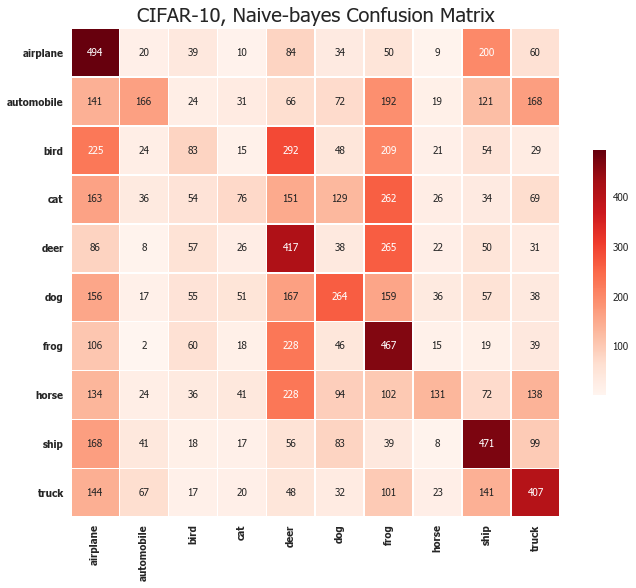

In [47]:
plot_confusion_matrix(cifar_test[:,0], cifar_predictions[:],'CIFAR-10, Naive-bayes Confusion Matrix',class_names)

## Comparison with a random classifier
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
Now, let's compare accuracy and performance of the Naive-bayes classifier with the ones of a random classifier, i.e., a classifier that randomly generates labels.<br>
Since there are 10 classes in both datasets, I expect each class to have a probability of $\frac{1}{10}$, so an accuracy of ~10%. 

In [49]:
start_time = time.time()
mnist_random_predictions = np.random.randint(0, N, len(mnist_test))
elapsed_time = time.time() - start_time
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)
print('Fashion MNIST - Accuracy Random Classifier: %.2f%%' % (accuracy(mnist_random_predictions, mnist_test[:,0]) * 100))

start_time = time.time()
cifar_random_predictions = np.random.randint(0, N, len(cifar_test))
elapsed_time = time.time() - start_time
print('CIFAR-10 - Elapsed time: %.2f s' %elapsed_time)
print('CIFAR-10 - Accuracy Random Classifier: %.2f%%' % (accuracy(cifar_random_predictions, cifar_test[:,0]) * 100))

Fashion MNIST - Elapsed time: 0.04 s
Fashion MNIST - Accuracy Random Classifier: 9.90%
CIFAR-10 - Elapsed time: 0.00 s
CIFAR-10 - Accuracy Random Classifier: 10.29%


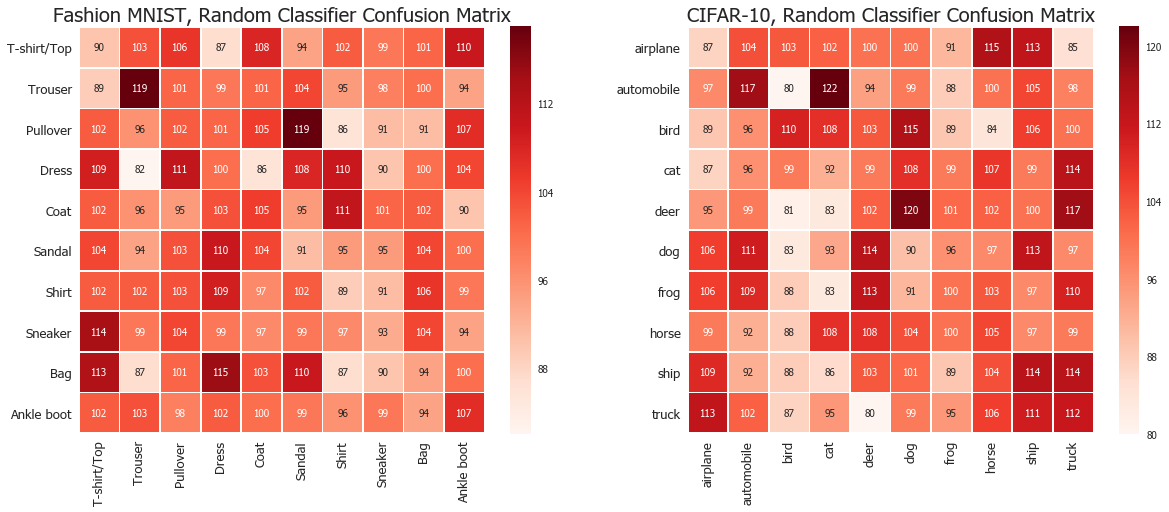

In [93]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,15)

# Compute confusion matrix for Fashion MNIST random classifier
cnf_matrix = confusion_matrix(mnist_test[:,0], mnist_random_predictions)
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[0].set_title('Fashion MNIST, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax=axes[0],square=True,linewidths=.7, cbar_kws={"shrink": .5})
ax.set_xticklabels(mnist_labels,fontsize=13, rotation=90)
b = ax.set_yticklabels(mnist_labels,fontsize=13,rotation=360)

# Compute confusion matrix for CIFAR-10 random classifier
cnf_matrix = confusion_matrix(cifar_test[:,0], cifar_random_predictions)
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[1].set_title('CIFAR-10, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax = axes[1],square=True,linewidths=.7, cbar_kws={"shrink": .5})
ax.set_xticklabels(class_names,fontsize=13, rotation=90)
b = ax.set_yticklabels(class_names,fontsize=13, rotation=360)

<div class="alert alert-success">
  <strong>Question 3F</strong><br>
<b><i>Discuss the performance, compare them against a classifier that outputs random class labels, and sugget ways in which performance could be improved.</i></b>
<p>
   Naive-Bayes classifier performances are not so good.<br>
   On Fashion MNIST I reach an accuracy of 57% while on CIFAR-10 30%.<br>
   The classifier is based on too simplistic assumptions that if on one hand make it very fast, on the other hand do not allow to reach good results.
</p>
  <p> 
    Naive-Bayes is by the way better than a random classifier, with which I obtain 10% accuracy (as expected). 
</p>

<p>
   A possible way to improve performances could be to reduce the input dimensionality, e.g. with PCA.
</p>
</div>

# Bayesian Linear Regression

## Introduction

<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
The Bayesian Linear Regression is based on the Bayes rule:
$$ p(w \mid X,t) = \frac{p(t\mid X,w) p(w)}{p(t\mid X)} $$
We know that $p(t \mid w, X, \sigma^2) = N(Xw, \sigma^2I)$, the prior conjugate to gaussian is gaussian so we choose $p(w) = N(0,S)$ (where $0$ and $S$ are design choices). So posterior must be gaussian $N(\mu, \Sigma)$, with:
$$ \Sigma = (\frac{1}{\sigma^2}X^TX + S^{-1})^{-1}$$
and
$$ \mu = \frac{1}{\sigma^2}\Sigma X^Tt $$

<div class="alert alert-success">
  <strong>Question 4D</strong><br>
  <b><i>Suggest a way to discretize predictions and display the confusion matrix on th test data and report accuracy. <br><br></i></b>
  There could be different possible way to discretize the output:
  <ul>
    <li>Rescale the output in the range [0,9] and then round it off;</li>
    <li>Round the output to the closer integer number in the range [0,9], s.t. <tt>output[output < 0] = 0</tt> and <tt>output[output > 9] = 9 </tt>.</li>
  </ul>
  However the second approach is the one that gives the best accuracy.
</div>

## Implementation

In [97]:
from sklearn.metrics import mean_squared_error

def get_X(x, n):
    
    """
    Compute the matrix 'X' featuring 'x' raised to higher powers.
    Rescaling of the original inputs is recommended in order to avoid numerical instability.
    
    """
    X_ = np.matrix(np.ones((np.shape(x)[0],1)))
    
    for i in range(n):
        X_ = np.hstack((X_, np.power(x,i+1))) 
  
    return X_

def get_Sigma(sigma_2, X, S):
    return np.linalg.inv(X.T * X / sigma_2 + np.linalg.inv(S))

def get_mean(sigma_2, Sigma, X, t):
    return 1/sigma_2 * Sigma.dot(X.T).dot(t) 

def get_predictions(y):
    y[y < 0] = 0
    y[y > 9] = 9
    return y

def lr_predict(x, t, x_test, t_test, k=1, sigma_2 = 1):
    X = get_X(x, k)
    X_test = get_X(x_test, k)
    S = np.diag(np.random.uniform(size=X.shape[1]))
    Sigma = get_Sigma(sigma_2, X, S)
    mu = get_mean(sigma_2, Sigma, X, t)
    
    mse = mean_squared_error((X_test * mu.T), t_test)
    
    predictions = X_test * mu.T
    discr_predictions = get_predictions(np.round(X_test * mu.T))

    variances = (sigma_2 + X_test * Sigma.I * X_test.T).diagonal()
    
    return mse, predictions.reshape(-1), discr_predictions.reshape(-1), variances

## Fashion MNIST

In [98]:
'''
    APPLY BAYESIAN LINEAR REGRESSION
'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = mnist_train[:,1:]
t = mnist_train[:,0]
x_test = mnist_test[:,1:]
t_test = mnist_test[:,0]
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x_test = scaler.fit_transform(x_test)

/Users/saragiammusso/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
K = 3
predictions = np.zeros(( K-1, len(x_test)))
discr_predictions = np.zeros(( K-1, len(x_test)))
variances = np.zeros(( K-1, len(x_test)))

for k in range(1,K):
    start_time = time.time()
    mse, predictions[k-1,:],  discr_predictions[k-1,:], variances[k-1,:] = lr_predict(x, t, x_test, t_test, k)
    elapsed_time = time.time() - start_time
    print('Order:', k, 'MSE: %.2f' %mse, 'Accuracy:',accuracy(discr_predictions[k-1,:], t_test)*100)
    print('Elapsed time: %.2f s' %elapsed_time)

Order: 1 MSE: 1.96 Accuracy: 39.11
Elapsed time: 16.68 s
Order: 2 MSE: 1.74 Accuracy: 44.6
Elapsed time: 39.40 s


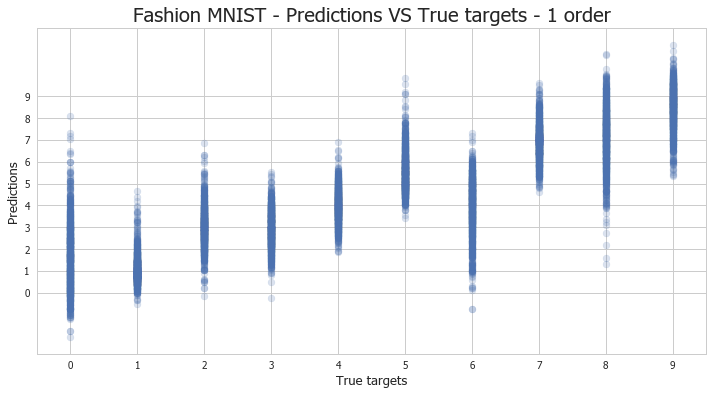

In [114]:
scatter_plot_ty(t_test, predictions[0], 'Fashion MNIST - Predictions VS True targets - 1 order')

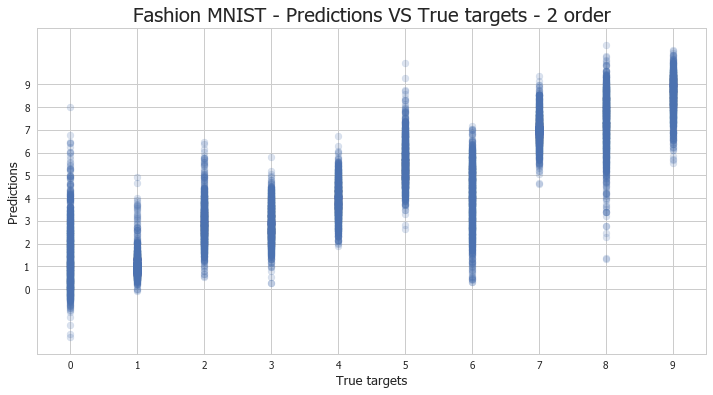

In [115]:
scatter_plot_ty(t_test, predictions[1], 'Fashion MNIST - Predictions VS True targets - 2 order')

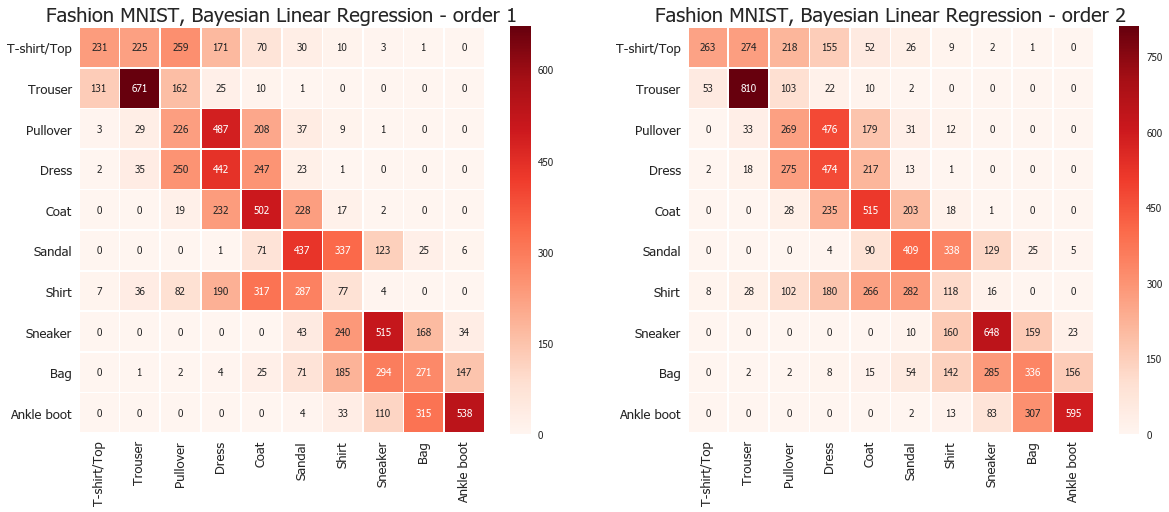

In [100]:
fig, axes = plt.subplots(1, K-1)
fig.set_size_inches(20,15)

for k in range(K-1):
    cnf_matrix = confusion_matrix(t_test, discr_predictions[k])
    df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
    axes[k].set_title('Fashion MNIST, Bayesian Linear Regression - order '+str(k+1),fontsize=20)
    ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax=axes[k],square=True,linewidths=.7, cbar_kws={"shrink": .5})
    ax.set_xticklabels(mnist_labels,fontsize=13,  rotation=90)
    ax.set_yticklabels(mnist_labels,fontsize=13, rotation=360)

## CIFAR-10

In [ ]:
'''
    APPLY BAYESIAN LINEAR REGRESSION
'''
from sklearn.preprocessing import MinMaxScaler

x = cifar_train[:,1:]
t = cifar_train[:,0]
x_test = cifar_test[:,1:]
t_test = cifar_test[:,0]
#print(np.shape(x), np.shape(t), np.shape(x_test),np.shape(t_test))
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x_test = scaler.fit_transform(x_test)

In [ ]:
K = 2
predictions = np.zeros(( K-1, len(x_test)))
discr_predictions = np.zeros(( K-1, len(x_test)))
variances = np.zeros(( K-1, len(x_test)))

for k in range(1,K):
    start_time = time.time()
    mse, predictions[k-1,:], discr_predictions[k-1,:], variances[k-1,:] = lr_predict(x, t, x_test, t_test, k)
    elapsed_time = time.time() - start_time
    print('Order:', k, 'MSE: %.2f' %mse,  'Accuracy:',accuracy(discr_predictions[k-1,:], t_test)*100)
    print('Elapsed time: %.2f' %elapsed_time)

In [ ]:
scatter_plot_ty(t_test, predictions[0], 'CIFAR-10 - Predictions VS True targets - 1 order')

In [ ]:
plot_confusion_matrix(t_test, discr_predictions[0,:],'CIFAR-10, Bayesian Linear Regression ',class_names)


<div class="alert alert-success">
  <strong>Question 4E</strong><br>
  <b><i>Discuss regression performance with respect to classification performance.</i></b><br>
  <p>
  Regression performances are definitely worse than the Naive-Bayes classifier. Not only the computation time is higher but also the accuracy is lower. </p>
</div>

<div class="alert alert-success">
  <strong>Question 4F</strong><br>
  <b><i>Describe one limitation of using regression for this particular task. </i></b><br>
  <p>A discretization technique must be chosen and the accuracy may suffer this choice. Moreover we cannot easily establish a good criteria for choosing this technique because there is not an  </p>
</div>

# Bonus Point

Here I will try to apply Naive Bayes classification to the output of convolutional layer in a Convolutional Neural Network with a LeNet architecture.

In [191]:
# Import libraries
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Activation
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.utils import to_categorical

def build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, channels = 1, epochs = 10): 
    input_shape = (img_rows, img_cols, channels)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape, name='first'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='second'))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', name='third'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='fourth'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(250, activation='relu',name='fifth'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    model.summary()

    model.fit(X_train, y_train,
              batch_size=50,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)

    print('accuracy: ',score[1])
    print('loss: ',score[0])
    return model

## Fashion MNIST

In [206]:
'''
Fashion MNIST - Data Pre-processing
'''
from sklearn.preprocessing import StandardScaler

X_train = np.array(data_train_mnist.iloc[:, 1:])
X_test = np.array(data_test_mnist.iloc[:, 1:])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = to_categorical(np.array(data_train_mnist.iloc[:, 0]))
y_test = to_categorical(np.array(data_test_mnist.iloc[:, 0]))

img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


'''
Fashion MNIST - Build CNN 
'''
model = build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, 1, 5)

/Users/saragiammusso/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
second (MaxPooling2D)        (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
third (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
fourth (MaxPooling2D)        (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
__________

In [207]:
from keras.models import Model

'''
Fashion MNIST - Choice of the right layer and intermediate predictions
'''
intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer('fifth').output)
intermediate_train = intermediate_layer_model.predict(X_train)
intermediate_test = intermediate_layer_model.predict(X_test)

#print(np.shape(intermediate_train), np.shape(intermediate_test))

'''
Fashion MNIST - Compute prior, means and variances
'''
# Compute mu, sigma2, and p(t=k) for all the classes
N = 10
# prior_means_variances requires y+X
intermediate_mnist_train = np.hstack((mnist_train[:,0].reshape(-1,1), intermediate_train))
mnist_prior, mnist_means, mnist_vars = prior_means_variances(intermediate_mnist_train, N)

'''
Fashion MNIST - CNN + Naive-Bayes Prediction
'''

start_time = time.time()
mnist_predictions, mnist_likelihood = predict(intermediate_test, mnist_prior, mnist_means, mnist_vars)
elapsed_time = time.time() - start_time
accuracy_ = accuracy(mnist_predictions, mnist_test[:,0])

print('Fashion MNIST - Accuracy Naive-Bayes: %.2f%%' % (accuracy_ * 100))
print('Fashion MNIST - Likelihood: %.2f' %mnist_likelihood)
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)

Fashion MNIST - Accuracy Naive-Bayes: 89.35%
Fashion MNIST - Likelihood: 5373793.46
Fashion MNIST - Elapsed time: 0.27 s


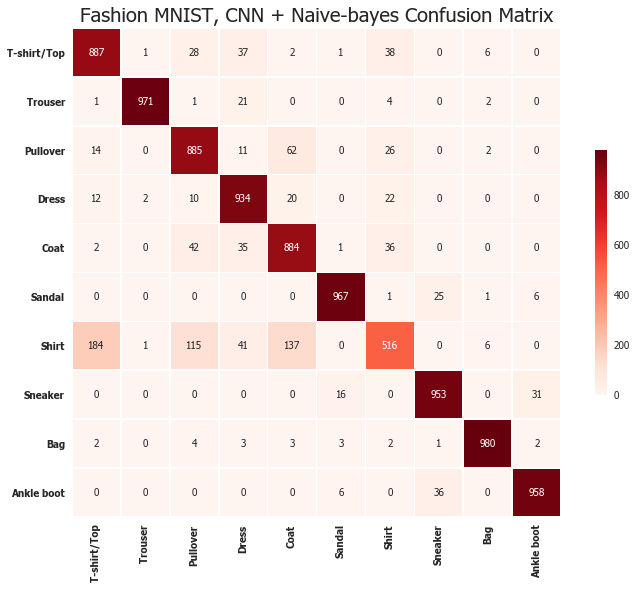

In [208]:
plot_confusion_matrix(mnist_test[:,0], mnist_predictions[:],'Fashion MNIST, CNN + Naive-bayes Confusion Matrix', mnist_labels)

## CIFAR-10

In [ ]:
'''
CIFAR-10 - Data Pre-processing
'''
X_train = np.array(cifar_train[:, 1:])
X_test = np.array(cifar_test[:, 1:])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = to_categorical(np.array(cifar_train[:, 0]))
y_test = to_categorical(np.array(cifar_test[:, 0]))

img_rows, img_cols = 32, 32

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


'''
CIFAR-10 - Build CNN 
'''

model = build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, 3, 25)

In [185]:
'''
CIFAR-10 - Choice of the right layer and intermediate predictions
'''
intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer('fifth').output)
intermediate_train = intermediate_layer_model.predict(X_train)
intermediate_test = intermediate_layer_model.predict(X_test)

#print(np.shape(intermediate_train), np.shape(intermediate_test))

'''
CIFAR-10 - Compute prior, means and variances
'''
# Compute mu, sigma2, and p(t=k) for all the classes
N = 10
# prior_means_variances requires y+X
intermediate_cifar_train = np.hstack((cls.reshape(-1,1), intermediate_train))
cifar_prior, cifar_means, cifar_vars = prior_means_variances(intermediate_cifar_train, N)

'''
Fashion MNIST - CNN + Naive-Bayes Prediction
'''

start_time = time.time()
cifar_predictions, cifar_likelihood = predict(intermediate_test, cifar_prior, cifar_means, cifar_vars)
elapsed_time = time.time() - start_time
accuracy_ = accuracy(cifar_predictions, cifar_test[:,0])

print('Fashion MNIST - Accuracy Naive-Bayes: %.2f%%' % (accuracy_ * 100))
print('Fashion MNIST - Likelihood: %.2f' %cifar_likelihood)
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)

Fashion MNIST - Accuracy Naive-Bayes: 10.00%
Fashion MNIST - Likelihood: 13537277.42
Fashion MNIST - Elapsed time: 0.15 s


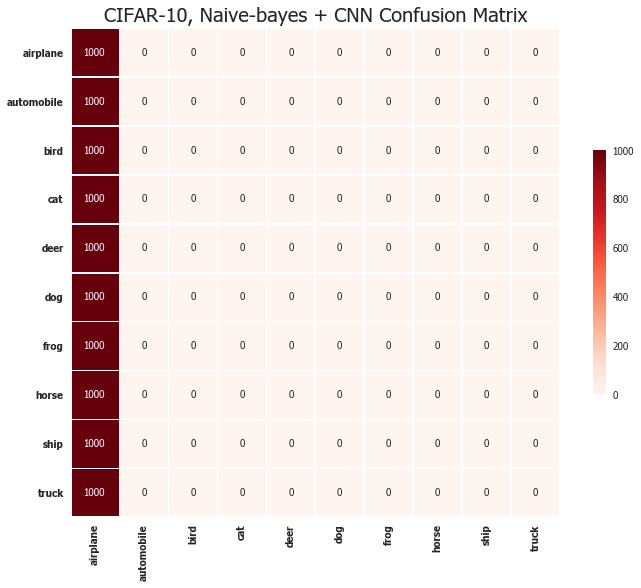

In [186]:
plot_confusion_matrix(cifar_test[:,0], cifar_predictions[:],'CIFAR-10, Naive-bayes + CNN Confusion Matrix', class_names)